In [1]:
import multirex as mrex
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys 
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

%matplotlib inline
waves=np.loadtxt("waves.txt")
n_points = len(waves)

In [2]:
# Función para normalizar por filas con Min-Max
def normalize_min_max_by_row(df):
    min_by_row = df.min(axis=1)
    max_by_row = df.max(axis=1)
    range_by_row = max_by_row - min_by_row
    normalized = (df.sub(min_by_row, axis=0)).div(range_by_row, axis=0)
    normalized[range_by_row == 0] = 0  
    return normalized

def plot_confusion_matrix(y_test, y_pred, labels, display_labels, title):
    """
    Función para calcular y mostrar la matriz de confusión con etiquetas descriptivas y un título personalizado.

    Parámetros:
    - y_test: Array con los valores reales.
    - y_pred: Array con las predicciones del modelo.
    - labels: Lista de las etiquetas de clase en el orden en que deben ser tratadas.
    - display_labels: Lista con los nombres descriptivos para las etiquetas de las clases para visualización.
    - title: String con el título para el gráfico de la matriz de confusión.
    """
    cm = confusion_matrix(y_test, y_pred, labels=labels, normalize='true')

    fig, ax = plt.subplots(figsize=(8, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(values_format=".0%", colorbar=True, ax=ax)
    disp.im_.colorbar.remove() 
    disp.im_.set_clim(0, 1)  

    # Crea manualmente la barra de colores con los límites correctos
    cbar = fig.colorbar(disp.im_, ax=ax)
    cbar.ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))  
    # Ajustes de formato y título
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.title(title, fontsize=20)
    plt.show()

mix_ratios = np.logspace(-10,-1,10)


## load data

In [3]:
import ast
# Función para convertir string a lista
def string_to_list(string):
    return ast.literal_eval(string)


O3_data = pd.read_csv("spec_data/O3_data.csv")
O3_data["label"] = O3_data["label"].apply(string_to_list)
O3_data["label"] = O3_data["label"].apply(lambda x: x[1])
O3_data.data = O3_data.iloc[:,-n_points:]
O3_data.params = O3_data.iloc[:,:-n_points]

CO2_data = pd.read_csv("spec_data/CO2_data.csv")
CO2_data["label"] = CO2_data["label"].apply(string_to_list)
CO2_data["label"] = CO2_data["label"].apply(lambda x: x[1])
CO2_data.data = CO2_data.iloc[:,-n_points:]
CO2_data.params = CO2_data.iloc[:,:-n_points]


C:\Users\santi\AppData\Local\Temp\ipykernel_19860\1236364971.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  O3_data.data = O3_data.iloc[:,-n_points:]
C:\Users\santi\AppData\Local\Temp\ipykernel_19860\1236364971.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  O3_data.params = O3_data.iloc[:,:-n_points]
C:\Users\santi\AppData\Local\Temp\ipykernel_19860\1236364971.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CO2_data.data = CO2_data.iloc[:,-n_points:]
C:\Users\santi\AppData\Local\Temp\ipykernel_19860\1236364971.py:17: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.p

## train data

### SNR = 1

In [4]:
SNR1_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                   n_repeat=5000,
                                   SNR=1)

SNR1_O3 = mrex.generate_df_SNR_noise(df=O3_data,
                                      n_repeat=250,
                                      SNR=1)

SNR1=pd.concat([SNR1_CO2,SNR1_O3],ignore_index=True)

### SNR = 3

In [5]:
SNR3_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                   n_repeat=5000,
                                   SNR=3)

SNR3_O3 = mrex.generate_df_SNR_noise(df=O3_data,
                                      n_repeat=250,
                                      SNR=3)
SNR3=pd.concat([SNR3_CO2,SNR3_O3],ignore_index=True)

### SNR = 6

In [6]:
SNR6_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                      n_repeat=5000,
                                      SNR=6)

SNR6_O3 = mrex.generate_df_SNR_noise(df=O3_data,
                                     n_repeat=500,
                                     SNR=6)

SNR6=pd.concat([SNR6_CO2,SNR6_O3],ignore_index=True)

### SNR = 10

In [7]:
SNR10_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                        n_repeat=5000,
                                        SNR=10)
SNR10_O3 = mrex.generate_df_SNR_noise(df=O3_data,
                                        n_repeat=500,
                                        SNR=10)

SNR10=pd.concat([SNR10_CO2,SNR10_O3],ignore_index=True)

### SNR = 20

In [8]:
SNR20_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                        n_repeat=5000,
                                        SNR=20)

SNR20_O3 = mrex.generate_df_SNR_noise(df=O3_data,
                                        n_repeat=500,
                                        SNR=20)

SNR20=pd.concat([SNR20_CO2,SNR20_O3],ignore_index=True)

### SNR = NaN

In [9]:
SNRnan_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                        n_repeat=10000,
                                        SNR=1e4)

SNRnan_O3 = mrex.generate_df_SNR_noise(df=O3_data,
                                        n_repeat=1000,
                                        SNR=1e4)

SNRnan=pd.concat([SNRnan_CO2,SNRnan_O3],ignore_index=True)

## RF

In [10]:
SNRall = pd.concat([SNR1,SNR3,SNR6,SNR10,SNR20,SNRnan],ignore_index=True)

print(SNRall["label"].value_counts())

SNRall_train, SNRall_test = train_test_split(SNRall, test_size=0.2,)
SNRall_train.iloc[:,-n_points:]=normalize_min_max_by_row(SNRall_train.iloc[:,-n_points:])
SNRall_X_train = SNRall_train.iloc[:, -n_points:]
SNRall_y_train = SNRall_train["label"].astype(int)


label
0    105000
1     90000
Name: count, dtype: int64


In [11]:
SNRall_rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=200,
    criterion="entropy",
    min_samples_leaf=3,
    n_jobs=-1
                            )

SNRall_rf.fit(SNRall_X_train, SNRall_y_train) 


c:\Users\santi\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

RandomForestClassifier(criterion='entropy', max_depth=200, min_samples_leaf=3,
                       n_estimators=400, n_jobs=-1)

In [12]:
## save random forest
import joblib

joblib.dump(SNRall_rf, "O3_rf.joblib")

['O3_rf.joblib']

### Test

In [13]:
SNR = 1

SNR_val_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                        n_repeat=10000,
                                        SNR=SNR)
SNR_val_O3 = mrex.generate_df_SNR_noise(df=O3_data,
                                         n_repeat=1000,
                                         SNR=SNR)
SNR_val= pd.concat([SNR_val_CO2,SNR_val_O3],ignore_index=True)

SNR_val_test = SNR_val


SNR_val_test.iloc[:,-n_points:]=normalize_min_max_by_row(SNR_val_test.iloc[:,-n_points:])

SNR_val_X_test = SNR_val_test.iloc[:, -n_points:]
SNR_val_y_test = SNR_val_test["label"].astype(int)


c:\Users\santi\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

[[19260 10740]
 [ 8724 21276]]
              precision    recall  f1-score   support

           0       0.69      0.64      0.66     30000
           1       0.66      0.71      0.69     30000

    accuracy                           0.68     60000
   macro avg       0.68      0.68      0.68     60000
weighted avg       0.68      0.68      0.68     60000



c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

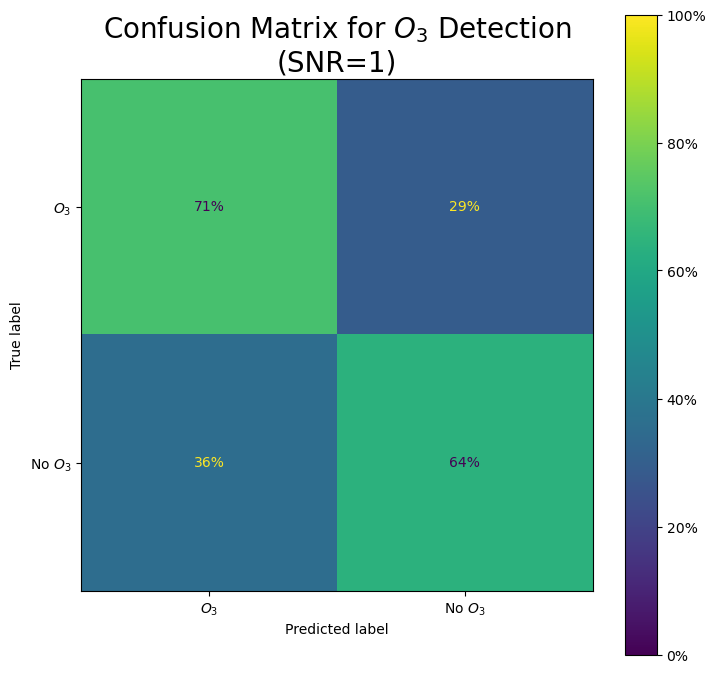

In [14]:
SNR_val_predictions = SNRall_rf.predict_proba(SNR_val_X_test)[:, 1]
threshold = 0.33
SNR_val_y_pred = (SNR_val_predictions > threshold).astype(int)

SNR_val_test["pred"] = SNR_val_y_pred
SNR_val_test["score"] = SNR_val_predictions

print(confusion_matrix(SNR_val_y_test, SNR_val_y_pred))
print(classification_report(SNR_val_y_test, SNR_val_y_pred))

plot_confusion_matrix(
    SNR_val_y_test, SNR_val_y_pred,
    labels=[1,0], display_labels=["$O_3$", "No $O_3$"],
    title=f"Confusion Matrix for $O_3$ Detection\n(SNR={SNR})"
)

c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

Text(0.5, 1.0, 'Scores for $O_3$ Detection\n(SNR=1)')

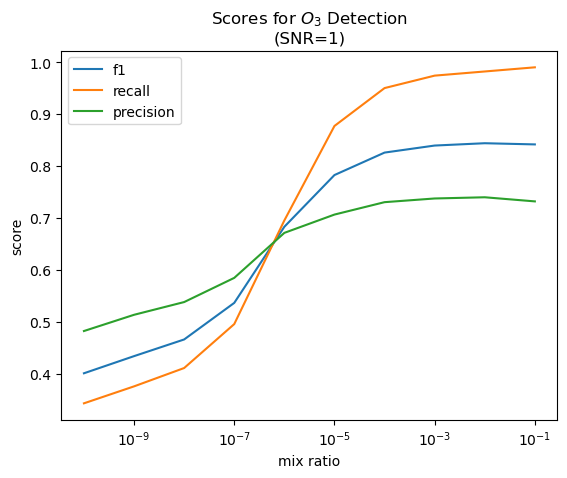

In [15]:
SNR_val_by_atmO3=[[] for i in range(10)]

for i, j in enumerate(range(-10,-0)):
    SNR_val_by_atmO3[i]=SNR_val_test[SNR_val_test["atm O3"]==j]
    co2=int(len(SNR_val_test[SNR_val_test["label"]==0])/10)
    SNR_val_by_atmO3[i]=pd.concat([SNR_val_by_atmO3[i],
                                      SNR_val_test[SNR_val_test["label"]==0].sample(n=co2)])
    
SNR_val_f1 = np.zeros(len(mix_ratios))
SNR_val_recall = np.zeros(len(mix_ratios))
SNR_val_precision = np.zeros(len(mix_ratios))
SNR_val_score = np.zeros(len(mix_ratios))

for j in range(len(mix_ratios)):
                
                SNR_val_f1[j] = f1_score(
                    SNR_val_by_atmO3[j]["label"].astype(int),
                    SNR_val_by_atmO3[j]["pred"].astype(int)
                    )
                
                SNR_val_recall[j] = recall_score(
                    SNR_val_by_atmO3[j]["label"].astype(int),
                    SNR_val_by_atmO3[j]["pred"].astype(int)
                    )
                
                SNR_val_precision[j]=precision_score(
                    SNR_val_by_atmO3[j]["label"].astype(int),
                    SNR_val_by_atmO3[j]["pred"].astype(int)
                    )

## plot scores
plt.figure()
plt.plot(mix_ratios,SNR_val_f1,label="f1")
plt.plot(mix_ratios,SNR_val_recall,label="recall")
plt.plot(mix_ratios,SNR_val_precision,label="precision")

plt.xlabel("mix ratio")
plt.xscale("log")
plt.ylabel("score")

plt.legend()
plt.title(f"Scores for $O_3$ Detection\n(SNR={SNR})")